In [47]:

import pandas as pd  
import numpy as np
""" rom sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import  train_test_split
import time
import matplotlib.pyplot as plt
"""

' rom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, f1_score\nfrom tensorflow.keras.models import Sequential\nfrom tensorflow.keras.layers import Dense\nfrom sklearn.model_selection import  train_test_split\nimport time\nimport matplotlib.pyplot as plt\n'

# Nacteni dat

In [ ]:
result = pd.read_csv('../Dataset/archive/results.csv')
drivers = pd.read_csv('../Dataset/archive/drivers.csv')
races = pd.read_csv('../Dataset/archive/races.csv')
constructors_result = pd.read_csv('../Dataset/archive/constructor_result.csv')
constructors_standing = pd.read_csv('../Dataset/archive/constructor_standings.csv')


In [49]:
races

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1120,1140,2024,20,32,Mexico City Grand Prix,2024-10-27,20:00:00,https://en.wikipedia.org/wiki/2024_Mexico_City...,2024-10-25,18:30:00,2024-10-25,22:00:00,2024-10-26,17:30:00,2024-10-26,21:00:00,\N,\N
1121,1141,2024,21,18,São Paulo Grand Prix,2024-11-03,17:00:00,https://en.wikipedia.org/wiki/2024_S%C3%A3o_Pa...,2024-11-01,14:30:00,2024-11-01,18:30:00,\N,\N,2024-11-02,18:00:00,2024-11-02,14:00:00
1122,1142,2024,22,80,Las Vegas Grand Prix,2024-11-23,06:00:00,https://en.wikipedia.org/wiki/2024_Las_Vegas_G...,2024-11-21,02:30:00,2024-11-21,06:00:00,2024-11-22,02:30:00,2024-11-22,06:00:00,\N,\N
1123,1143,2024,23,78,Qatar Grand Prix,2024-12-01,17:00:00,https://en.wikipedia.org/wiki/2024_Qatar_Grand...,2024-11-29,13:30:00,2024-11-29,17:30:00,\N,\N,2024-11-30,17:00:00,2024-11-30,13:00:00


In [ ]:
races2018 = races[races['year'] >= 2018]
races2018 = races2018[['raceId', 'year', 'circuitId', 'name', 'date']]


results2018 = result[result['raceId'].isin(races2018['raceId'])]

active_drivers_ids = results2018['driverId'].unique()
active_drivers = drivers[drivers['driverId'].isin(active_drivers_ids)]

active_drivers = active_drivers[['driverId', 'driverRef', 'forename', 'surname', 'nationality']]

acture_driver_standings = drivers_standings[drivers_standings['driverId'].isin(active_drivers_ids)]


,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
3,4,18,4,5.0,4,4,0
7,8,18,8,1.0,8,8,0
8,9,19,1,14.0,1,1,1
11,12,19,4,6.0,7,7,0
...,...,...,...,...,...,...,...
34858,73266,1144,858,0.0,23,23,0
34859,73267,1144,860,7.0,18,18,0
34860,73268,1144,861,5.0,19,19,0
34861,73269,1144,859,4.0,21,21,0


In [61]:
acture_driver_standings.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5243 entries, 0 to 34862
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   driverStandingsId  5243 non-null   int64  
 1   raceId             5243 non-null   int64  
 2   driverId           5243 non-null   int64  
 3   points             5243 non-null   float64
 4   position           5243 non-null   int64  
 5   positionText       5243 non-null   object 
 6   wins               5243 non-null   int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 327.7+ KB


In [52]:
results2018

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
23777,23782,989,20,6,5,3,1,1,1,25.0,58,1:29:33.283,5373283,53,4,1:26.469,220.782,1
23778,23783,989,1,131,44,1,2,2,2,18.0,58,+5.036,5378319,50,3,1:26.444,220.845,1
23779,23784,989,8,6,7,2,3,3,3,15.0,58,+6.309,5379592,57,2,1:26.373,221.027,1
23780,23785,989,817,9,3,8,4,4,4,12.0,58,+7.069,5380352,54,1,1:25.945,222.128,1
23781,23786,989,4,1,14,10,5,5,5,10.0,58,+27.886,5401169,57,7,1:26.978,219.489,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,26760,1144,825,210,20,14,16,16,16,0.0,57,\N,\N,57,1,1:25.637,222.002,11
26755,26761,1144,859,215,30,12,17,17,17,0.0,55,\N,\N,52,12,1:28.751,214.212,5
26756,26762,1144,822,15,77,9,\N,R,18,0.0,30,\N,\N,14,19,1:29.482,212.462,130
26757,26763,1144,861,3,43,20,\N,R,19,0.0,26,\N,\N,5,17,1:29.411,212.631,5


In [53]:
data_left = pd.merge(results2018, races2018, on='raceId', how='left')
data_left = pd.merge(data_left, active_drivers, on='driverId', how='left')

In [54]:
#data_left.to_csv('../Dataset/output/results2018.csv', index=False)

In [55]:
data_left

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,fastestLapSpeed,statusId,year,circuitId,name,date,driverRef,forename,surname,nationality
0,23782,989,20,6,5,3,1,1,1,25.0,...,220.782,1,2018,1,Australian Grand Prix,2018-03-25,vettel,Sebastian,Vettel,German
1,23783,989,1,131,44,1,2,2,2,18.0,...,220.845,1,2018,1,Australian Grand Prix,2018-03-25,hamilton,Lewis,Hamilton,British
2,23784,989,8,6,7,2,3,3,3,15.0,...,221.027,1,2018,1,Australian Grand Prix,2018-03-25,raikkonen,Kimi,Räikkönen,Finnish
3,23785,989,817,9,3,8,4,4,4,12.0,...,222.128,1,2018,1,Australian Grand Prix,2018-03-25,ricciardo,Daniel,Ricciardo,Australian
4,23786,989,4,1,14,10,5,5,5,10.0,...,219.489,1,2018,1,Australian Grand Prix,2018-03-25,alonso,Fernando,Alonso,Spanish
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,26760,1144,825,210,20,14,16,16,16,0.0,...,222.002,11,2024,24,Abu Dhabi Grand Prix,2024-12-08,kevin_magnussen,Kevin,Magnussen,Danish
2975,26761,1144,859,215,30,12,17,17,17,0.0,...,214.212,5,2024,24,Abu Dhabi Grand Prix,2024-12-08,lawson,Liam,Lawson,New Zealander
2976,26762,1144,822,15,77,9,\N,R,18,0.0,...,212.462,130,2024,24,Abu Dhabi Grand Prix,2024-12-08,bottas,Valtteri,Bottas,Finnish
2977,26763,1144,861,3,43,20,\N,R,19,0.0,...,212.631,5,2024,24,Abu Dhabi Grand Prix,2024-12-08,colapinto,Franco,Colapinto,Argentinian


In [56]:
data_left['position'] = data_left['position'].replace('\\N',0).astype(int)

In [57]:
data_left['time'].info()
data_left.to_csv('../Dataset/output/results2018.csv', index=False)

<class 'pandas.core.series.Series'>
RangeIndex: 2979 entries, 0 to 2978
Series name: time
Non-Null Count  Dtype 
--------------  ----- 
2979 non-null   object
dtypes: object(1)
memory usage: 23.4+ KB


In [58]:
data_left['winner'] = (data_left['positionOrder'] == 1).astype(int)

In [59]:
data_left

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,...,statusId,year,circuitId,name,date,driverRef,forename,surname,nationality,winner
0,23782,989,20,6,5,3,1,1,1,25.0,...,1,2018,1,Australian Grand Prix,2018-03-25,vettel,Sebastian,Vettel,German,1
1,23783,989,1,131,44,1,2,2,2,18.0,...,1,2018,1,Australian Grand Prix,2018-03-25,hamilton,Lewis,Hamilton,British,0
2,23784,989,8,6,7,2,3,3,3,15.0,...,1,2018,1,Australian Grand Prix,2018-03-25,raikkonen,Kimi,Räikkönen,Finnish,0
3,23785,989,817,9,3,8,4,4,4,12.0,...,1,2018,1,Australian Grand Prix,2018-03-25,ricciardo,Daniel,Ricciardo,Australian,0
4,23786,989,4,1,14,10,5,5,5,10.0,...,1,2018,1,Australian Grand Prix,2018-03-25,alonso,Fernando,Alonso,Spanish,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2974,26760,1144,825,210,20,14,16,16,16,0.0,...,11,2024,24,Abu Dhabi Grand Prix,2024-12-08,kevin_magnussen,Kevin,Magnussen,Danish,0
2975,26761,1144,859,215,30,12,17,17,17,0.0,...,5,2024,24,Abu Dhabi Grand Prix,2024-12-08,lawson,Liam,Lawson,New Zealander,0
2976,26762,1144,822,15,77,9,0,R,18,0.0,...,130,2024,24,Abu Dhabi Grand Prix,2024-12-08,bottas,Valtteri,Bottas,Finnish,0
2977,26763,1144,861,3,43,20,0,R,19,0.0,...,5,2024,24,Abu Dhabi Grand Prix,2024-12-08,colapinto,Franco,Colapinto,Argentinian,0


<Axes: >

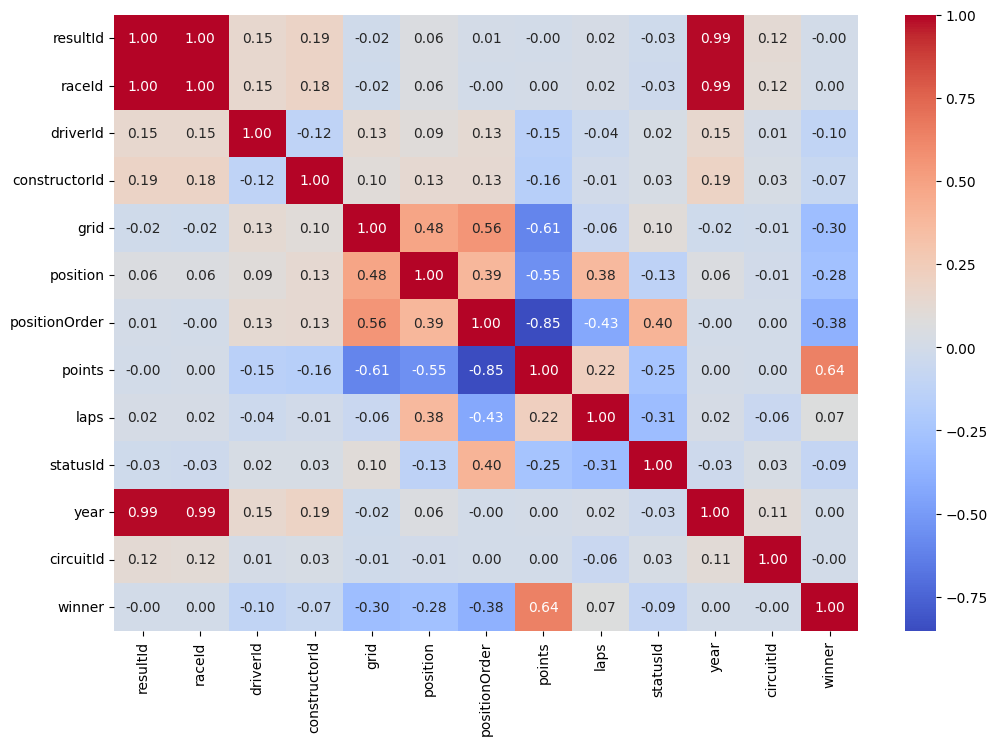

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns


numeric_columns = data_left.select_dtypes(include=['float64','int64' ])
corr = numeric_columns.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr,annot=True, cmap='coolwarm', fmt='.2f')